ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **21Apr23**

# 19. Continuous Stirred-Tank Reactor w/ Cooling Coil 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\pvec}{\boldsymbol{p}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
* [Problem Statement](#ps)
* [Parameter Data](#param)
* [State Data](#state)
* [Degrees of Freedom](#dof)
* [Total Mass Balance](#mb)
* [Species Mass Balance](#smb)
* [Energy Balance](#eb)
* [Evolve Reactor](#cstrrun)
  + [Initial Condition](#initial)
  + [Results](#res)
* [Final Comments](#final-comments)
* [Interactive Results](#ires)
---

## [Objectives](#toc)<a id="obj"></a>
+ Introduce the computational notebook approach to problem solving.
+ Combine content, problem setup, computational methods, calculations, and interactive analysis in one *live*, exchangeable, portable (web-based) document.
+ Use chemical reaction engineering methods applied to a chemical reactor problem example: open system, time-dependent, non-isothermal, single, exothermic chemical reaction, two species, **unstable steady states**.

## [Problem Statement](#toc)<a id="ps"></a>

This problem was extracted from Example 2.5 in the book: *Process Dynamics and Control*, Seborg, Edgar, Mellichamp, and Doyle, 4$^\text{th}$ edition, 2017, which is the textbook for **ChEn-4130 Process Control**. Refer to course notes OneNote [ChEn-3170-chen-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EvWwc3clPMlOs2HjLFsycowBL1m5QQ8si4MAupI8hSjziA?e=IMHYpb).

Compute the effect of a step change in the coolant temperature $T_c$ in the positive and negative directions for the **exothermic**, irreversible first-order reaction, 

\begin{equation*}
\text{A} \overset{k}{\longrightarrow} \text{B}  ,
\end{equation*}

with reaction rate 

\begin{equation*}
r_1 = k\,c_\text{A}\,c_\text{B}^0  ,
\end{equation*}

and Arrhenius expression $k = k_0\,\exp(\frac{-E}{R\,T})$ in a CSTR (figure below). The three state variables of the ODEs are the concentration of A, $c_\text{A}$, and B, $c_\text{B}$, and
the reactor temperature $T$. The manipulated input variable is the jacket coolant temperature $T_\text{c}$. Two cases are
simulated, one based on the increased cooling by changing $T_c$ from 300 to 290 K, and one reducing the cooling rate by increasing $T_\text{c}$ from 300 to 305 K. 

Next, an interactive simulation shows the continuous effect of a change in coolant temperature and inflow molarity of the A species.

![](images/cstr.png)

## [Parameter Data](#toc)<a id="param"></a>

|Name                        | Parameter          | Value                | Unit             |
|:---------------------------|:------------------:|:--------------------:|:----------------:| 
|volumetric flow rate        | $q$                | 100                  | L/min            | 
|inflow molarity of A        | $c_\text{Ain}$     | 1                    | mol/L            | 
|inflow molarity of B        | $c_\text{Bin}$     | 0                    | mol/L            | 
|inflow temperature          | $T_\text{in}$      | 350                  | K                | 
|holdup volume               | $V$                | 100                  | L                | 
|mass density                | $\rho$             | 1000                 | g/L              |
|heat capacity               | $C$                | 0.239                | J/(g K)          |
|heat of reaction            | $\Delta H_\text{R}$| $-5 \times 10^4$     | J/mol            |
|Arrhenius frequency         | $k_0$              | $7.2 \times 10^{10}$ | $\text{min}^{-1}$|
|activation temperature      | $E/R$              | 8750                 | K                |
|coolant heat transfer coeff.| $UA$               | $5 \times 10^{4}$    | J/(min K)        |
|coolant temperature         | $T_\text{c}$       | 290,300,305          | K                |

Note this is an exothermic reaction of production of A  →  B and heat is removed from the system to prevent the temperature from increasing too much above the inflow stream temperature.

In [1]:
'''Parameters'''

params = dict()

params['q_flow']          =   100.0  # L/min
params['c_a_in']          =   1.0    # mol/L
params['c_b_in']          =   0.0    # mol/L
params['temp_in']         =   350.0  # K
params['volume']          =   100.0  # L
params['rho']             =   1000.0 # g/L
params['heat_capacity']   =   0.239  # J/g/K
params['enthalpy_rxn']    = - 5.0e4  # J/mol
params['k_0']             =   7.2e10 # 1/min
params['energy_a_over_r'] =   8750.0 # K
params['u_a']             =   5.0e4  # J/min/K
params['temp_c']          =   300.0  # K

params['c_a_0']           =   0.48    # mol/L  heel
params['c_b_0']           =   0.12    # mol/L  heel
params['temp_0']          =   350.0  # K

params['tau'] = params['volume']/params['q_flow'] # flow residence time min

## [State Data](#toc)<a id="state"></a>

|Name                        | Parameter          | Value                | Unit             |
|:---------------------------|:------------------:|:--------------------:|:----------------:| 
|initial reactor molarity    | $c_\text{A}(0)$    | 0.5                  | mol/L            |
|initial reactor molarity    | $c_\text{B}(0)$    | 0.12                 | mol/L            |
|initial reactor temperature | $T(0)$             | 350                  | K                |

In [2]:
'''State data'''

state = dict()

state['c_a_0']  =  0.48   # mol/L  heel
state['c_b_0']  =  0.12   # mol/L  heel
state['temp_0'] =  350.0  # K

## [Degrees of Freedom](#toc)<a id="dof"></a>
There exists four equations (below), the total mass balance forces the volumetric flow rate to be a constant because the flow is incompressible, therefore $q$ must be specified. There exists three unknowns, namely the molarity of species A, $c_\text{A}(t)$, molarity of species B, $c_\text{B}(t)$, and the temperature of the reactor, $T(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable give the initial conditions for the unknowns, and all the values of the parameters in the foregoing table.

## [Total Mass Balance](#toc)<a id="mb"></a>

The volumetric flow rate is a constant because the fluid is incompressible 

\begin{equation*}
q = q_\text{in} = \text{constant} .
\end{equation*}


## [Species Mole Balance](#toc)<a id="smb"></a>

\begin{equation*}
\frac{dc_\text{A}}{dt} = -\frac{1}{\tau}\bigl(c_\text{A}-c_\text{Ain}\bigr) + g_\text{A}(t) ,\\
\frac{dc_\text{B}}{dt} = -\frac{1}{\tau}\bigl(c_\text{B}-c_\text{Bin}\bigr) + g_\text{B}(t) ,
\end{equation*}

where $\tau = \frac{V}{q}$ is the flow residence time in the reactor, $g_\text{A}(t)$ is the species A production rate; similarly for species B, $g_\text{B}(t)$. Note that these equations are the classical relaxation process with a generation term where the relaxation time is the flow residence time $\tau$.

The species production rates are obtained from the stoichiometric relation 

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec 
\end{equation*}

for this problem it gives

\begin{equation*}
 \begin{pmatrix}
  -1 & 1 
 \end{pmatrix}^\top
 \,
 \begin{pmatrix}
  k\,c_\text{A}   
 \end{pmatrix} =
 \begin{pmatrix}
 -k\,c_\text{A}  \\ 
  k\,c_\text{A}
\end{pmatrix} =
\begin{pmatrix}
 g_\text{A} \\
 g_\text{B} 
\end{pmatrix}
\end{equation*}

where the reaction rate constant is expressed in the Arrhenius form $k = k_0\,e^{\frac{-E}{R\,T}}$.

In [3]:
'''Stoichiometric matrix'''

# (A → B)
import numpy as np
stoic_mtrx = np.zeros((1,2)) # stoichiometric matrix
stoic_mtrx[0,0] = -1.0
stoic_mtrx[0,1] =  1.0

params['stoic_mtrx'] = stoic_mtrx

# verify mass conservation is not violated
import numpy.linalg
assert numpy.linalg.matrix_rank(stoic_mtrx) < stoic_mtrx.shape[1]

## [Energy Balance](#toc)<a id="eb"></a>

\begin{equation*}
\frac{dT}{dt} = -\frac{1}{\tau}\,\bigl(T-T_\text{in}\bigr) 
                + \frac{1}{\rho C} \Bigl( \frac{\dot{Q}}{V} - \Delta H_\text{R}\,r_1 \Bigr)
\end{equation*}

where $r_1 = k\,c_A$ is the reaction rate, and the <font color="red">heat transfer model</font> for the cooling coil (heat exchanger) is 

\begin{equation*}
\dot{Q} = - U\,A\bigl(T-T_\text{c}\bigr) .
\end{equation*}

Note that $\frac{\dot{Q}}{V}$ is the power density of heating or cooling. Likewise $\Delta H_R\,r_1$ is the power density of chemical reaction heating or cooling. Here again, this is a classical relaxation model with relaxation time equal to the residence time $\tau$ in the presence of a generation term which is a combination of the external heating/cooling power and the chemical reaction heating/cooling power.

## [Vector ODE System](#toc)<a id="vodes"></a>

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. First, the usage of the stoichiometric matrix is instrumental for the case with multiple chemical reactions, where the reaction rates can be related to the species production rates that appear as sources in the species mass balances

Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar(\uvar, t; \pvec)
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3)$ and we assign 

\begin{align*}
 u_1(t)&=c_\text{A}(t),\\
 u_2(t)&=c_\text{B}(t),\\
 u_3(t)&=T .
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t;\pvec), f_2(\uvar,t;\pvec), f_3(\uvar,t;\pvec)\bigr)$ we assign 

\begin{align*}
 f_1 & = - \frac{1}{\tau}\,(u_1-c_\text{Ain}) + g_\text{A}, \\
 f_2 & = - \frac{1}{\tau}\,(u_2-c_\text{Bin}) + g_\text{B}, \\
 f_3 & = - \frac{1}{\tau}\,(u_3-T_\text{in}) 
         + \frac{1}{\rho C} \Bigl(\frac{\dot{Q}}{V} - \Delta H_\text{R}\,r_1 \Bigr) .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=c_\text{A}(0),\\
 u_2(0)&=c_\text{B}(0),\\
 u_3(0)&=T(0).
\end{align*}

In [4]:
'''ODE RHS function for integrator'''

def f_vec(t, u_vec, params):
    
    c_a  = u_vec[0]
    c_b  = u_vec[1]
    temp = u_vec[2]
    
    assert c_a  >= 0.0
    assert c_b  >= 0.0
    assert temp >= 0.0
    
    q_flow          = params['q_flow'] 
    c_a_in          = params['c_a_in'] 
    c_b_in          = params['c_b_in']
    temp_in         = params['temp_in']
    volume          = params['volume']
    rho             = params['rho']
    heat_capacity   = params['heat_capacity']
    enthalpy_rxn    = params['enthalpy_rxn']
    k_0             = params['k_0']
    energy_a_over_r = params['energy_a_over_r']
    u_a             = params['u_a']
    
    temp_c          = params['temp_c']  # coolant temperature
    
    stoic_mtrx      = params['stoic_mtrx']
    
    import math 
    k = k_0 * math.exp(-energy_a_over_r/temp)
    
    import numpy as np
    r_vec = np.zeros(1)
    r_vec[0] = k * c_a   # reaction rate vector
    
    g_vec = stoic_mtrx.transpose() @ r_vec  # species production rates S^T r = g
    
    tau = params['tau'] # flow residence time
    
    f_0 = - 1/tau*(c_a - c_a_in) + g_vec[0]
    
    f_1 = - 1/tau*(c_b - c_b_in) + g_vec[1]
    
    q_dot = - u_a * (temp - temp_c)
      
    f_2 = - 1/tau*(temp - temp_in) \
          + 1/rho/heat_capacity*(q_dot/volume - enthalpy_rxn * r_vec[0] )
    
    return np.array([f_0, f_1, f_2])

## [Evolve Reactor](#toc)<a id="cstrrun"></a>

In [6]:
'''Create the CSTR run function'''

def run_cstr(u_0_vec, f_vec, time_stamps, params):
    
    # ODE integrator
    from scipy.integrate import odeint

    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step
    
    # ODE integrator call    
    (u_vec_history, info_dict) = odeint(f_vec, u_0_vec, time_stamps,
                                        args=( params, ),
                                        rtol=1e-8, atol=1e-8, mxstep=max_n_steps_per_time_step,
                                        full_output=True, tfirst=True)

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

### [Initial Condition Data](#toc)<a id="initial"></a>

In [5]:
# Initial condition (not be confused with the inflow condition)
u_0_vec = np.zeros(3,dtype=np.float64)
    
u_0_vec[0] = state['c_a_0']
u_0_vec[1] = state['c_b_0']
u_0_vec[2] = state['temp_0']

### [Results](#toc)<a id="res"></a>

In [50]:
'''Evolve the CSTR'''

# Manipulated input variable
#params['temp_c'] =   290.0   # K  # tf = 10 * tau
#params['temp_c'] = 300.0  # K  # tf = 10 * tau 
params['temp_c'] =   304.0  # K  # tf = 25 * tau (limit cycle)
#params['temp_c'] =   305.0  # K  # tf = 35 * tau (limit cycle higher frequency)
#params['temp_c'] =   307.0  # K  # tf = 35 * tau (spiral to SS)

time_final   = 25 * params['tau']   # number of residence flow times to evolve
n_time_steps = 1000

import numpy as np
time_stamps = np.linspace(0.0, time_final, num=n_time_steps)

u_vec_history = run_cstr(u_0_vec, f_vec, time_stamps, params)

# print the solution in a tabular form
print('       Time [min]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]' )
idx = 0
for (t,u) in zip(time_stamps, u_vec_history):
    if idx%5 == 0: # print only every 5 time stamp
        print('%15.3e %15.3e %15.3e %15.3e'%(t, u[0], u[1], u[2]))
    idx += 1

       Time [min]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]
      0.000e+00       9.519e-01       4.806e-02       3.127e+02
      1.251e-01       9.510e-01       4.901e-02       3.159e+02
      2.503e-01       9.483e-01       5.169e-02       3.184e+02
      3.754e-01       9.442e-01       5.584e-02       3.205e+02
      5.005e-01       9.388e-01       6.120e-02       3.222e+02
      6.256e-01       9.325e-01       6.752e-02       3.236e+02
      7.508e-01       9.254e-01       7.460e-02       3.249e+02
      8.759e-01       9.177e-01       8.227e-02       3.260e+02
      1.001e+00       9.096e-01       9.038e-02       3.270e+02
      1.126e+00       9.012e-01       9.882e-02       3.279e+02
      1.251e+00       8.925e-01       1.075e-01       3.288e+02
      1.376e+00       8.837e-01       1.163e-01       3.296e+02
      1.502e+00       8.747e-01       1.253e-01       3.303e+02
      1.627e+00       8.657e-01       1.343e-01       3.310e+02
      1.752e+00       8.566e-01       1.

In [51]:
'''Plot A and B concentration in the reactor'''
def plot_cc(sig_dig=3):
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(15, 5))
    ax1.plot(time_stamps/params['tau'], np.round(u_vec_history[:,0],sig_dig),'b-',label='$T_c=$ '+str(params['temp_c']) )

    ax1.set_xlabel(r'Time [$\tau$] ($\tau=$%4.1f min)'%params['tau'],fontsize=16)
    ax1.set_ylabel(r'$c_A$ [mol/L]',fontsize=16,color='blue')
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    #ax1.legend(loc='best',fontsize=12)
    ax1.grid(True)

    ax2 = ax1.twinx() 
    ax2.plot(time_stamps/params['tau'], np.round(u_vec_history[:,1],sig_dig),'g-.',label='$T_c=$ '+str(params['temp_c']) )
    ax2.set_ylabel(r'$c_B$ [mol/L]',fontsize=16,color='green')
    ax2.tick_params(axis='y', labelcolor='green', labelsize=14)
    #ax2.legend(loc='best',fontsize=12)
    #ax2.grid(True)

    ax3 = ax1.twinx() 
    ax3.plot(time_stamps/params['tau'], np.round(u_vec_history[:,1]/u_vec_history[:,0],sig_dig),'r--',label='$T_c=$ '+str(params['temp_c']) )
    ax3.set_ylabel(r'$c_B/c_A$',fontsize=16,color='red')
    ax3.tick_params(axis='y', labelcolor='red', labelsize=14)
    #ax3.legend(loc='best',fontsize=12)
    #ax2.grid(True)
    ax3.spines["right"].set_position(("axes", 1.15))

    plt.title('CSTR w/ Cooling Coil (exothermic rxn)',fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

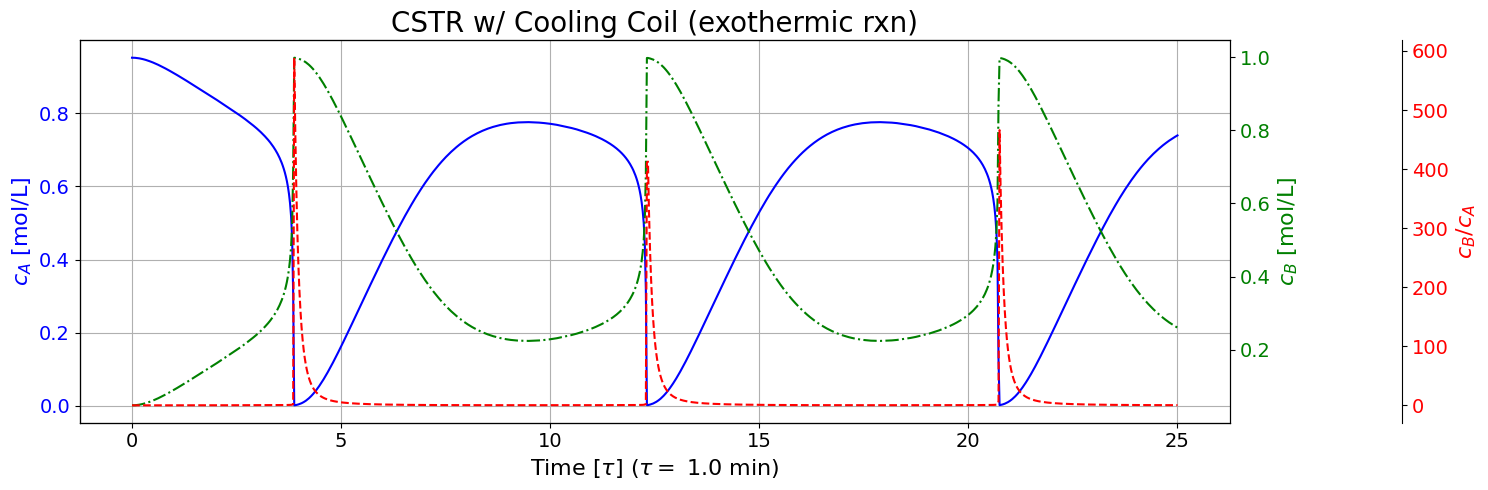

In [52]:
plot_cc(sig_dig=4)

In [53]:
'''Plot reactor temperature'''
def plot_temp(sig_dig=3):
    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots(1, figsize=(15, 5))
    ax1.plot(time_stamps/params['tau'], np.round(u_vec_history[:,2],sig_dig),'r-',label='$T_c=$ '+str(params['temp_c']) )

    ax1.set_xlabel(r'Time [$\tau$] ($\tau=$%4.1f min)'%params['tau'],fontsize=16)
    ax1.set_ylabel(r'$T$ [K]',fontsize=16,color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='upper left',fontsize=12)
    ax1.grid(True)

    ax2 = ax1.twinx() 
    k_cte = params['k_0']*np.exp(-params['energy_a_over_r']/u_vec_history[:,2])
    ax2.plot(time_stamps/params['tau'], np.round(k_cte,sig_dig),'-',color='navy',label='$T_c=$ '+str(params['temp_c']) )
    ax2.set_ylabel(r'$k$ [min$^{-1}$]',fontsize=16,color='navy')
    ax2.tick_params(axis='y', labelcolor='navy', labelsize=14)
    #ax2.legend(loc='best',fontsize=14)
    #ax2.grid(True)

    ax3 = ax1.twinx() 
    q_dot_dens = - params['u_a'] * (u_vec_history[:,2] - params['temp_c']) / params['volume'] / 60.0
    ax3.plot(time_stamps/params['tau'], np.round(q_dot_dens,sig_dig),'-',color='green',label='$T_c=$ '+str(params['temp_c']) )
    ax3.set_ylabel(r'$\dot{Q}/V$ [W/L]',fontsize=16,color='green')
    ax3.tick_params(axis='y', labelcolor='green', labelsize=14)
    #ax3.legend(loc='best',fontsize=14)
    #ax2.grid(True)
    ax3.spines["right"].set_position(("axes", 1.15))

    plt.title('CSTR w/ Cooling Coil (exothermic rxn)',fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    #plt.xticks(fontsize=14)
    #plt.yticks(fontsize=14)
    #plt.legend(loc='best',fontsize=12)
    #plt.grid(True)
    plt.show()
    print('')

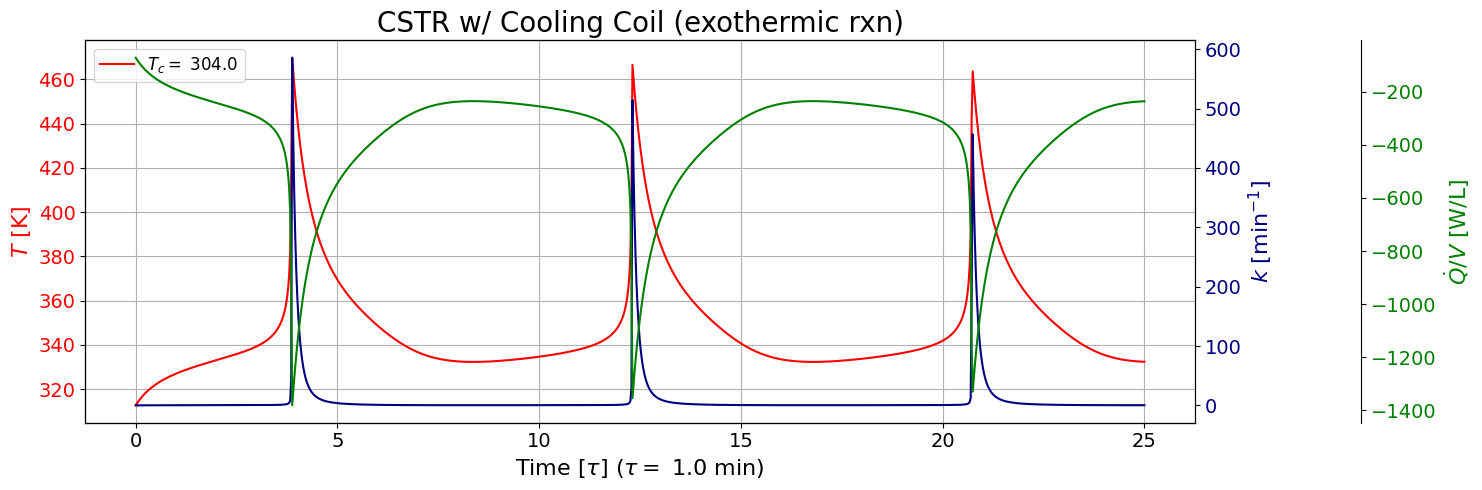

In [54]:
plot_temp(sig_dig=4)

In [55]:
'''Concentration phase space plot'''
def plot_phase():
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(5, 5))
    ax1.plot(u_vec_history[:,0], u_vec_history[:,1], 'b-',label='$T_c=$ '+str(params['temp_c']) )

    ax1.set_xlabel(r'$c_A$ [mol/L]',fontsize=16,color='blue')
    ax1.set_ylabel(r'$c_B$ [mol/L]',fontsize=16,color='blue')
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    #ax1.legend(loc='best',fontsize=12)
    #ax1.set_xlim(0.1504,0.1506)
    #ax1.set_ylim(0.8494,.8498)
    ax1.grid(True)

    plt.title('Concentration Phase Space Plot',fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

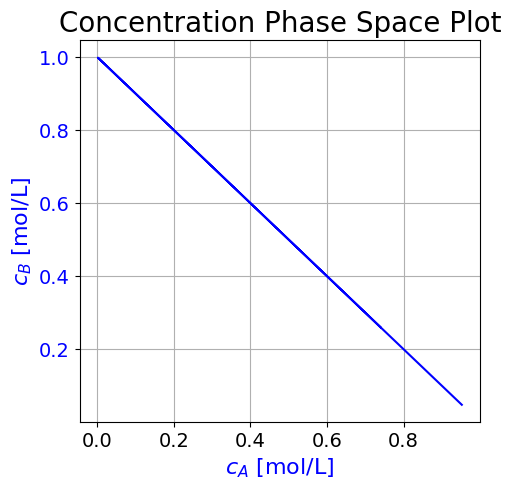

In [56]:
plot_phase()

In [ ]:
'''3D Phase Plot'''
import plotly.express as px
import numpy as np
import pandas as pd # spreadsheet python package
df = pd.DataFrame(u_vec_history, columns = ['C_A','C_B','T']) # convert numpy to pandas data frame
fig = px.line_3d(df, x='C_A', y='C_B', z='T')
fig.show()

## [Final Comments](#toc)<a id="final-comments"></a>

Under certain values of parameters the reactor steady state becomes unstable and enters a self-sustained periodic motion (a type of Hopf bifurcation in dynamical systems).

## [Interactive Results](#toc)<a id="ires"></a>

In [ ]:
# Select initial condition for interactive results

# Original initial condition
state['c_a_0']  =  0.48   # mol/L  heel
state['c_b_0']  =  0.12   # mol/L  heel
state['temp_0'] =  350.0  # K

# Last state as initial condition
state['c_a_0'] = u_vec_history[-1,0]
state['c_b_0'] = u_vec_history[-1,1]
state['temp_0'] = u_vec_history[-1,2]

In [ ]:
'''Create interactive plotting'''

# in case plotly is not installed
try:
    import plotly
except ImportError:
    print('Trying to install plotly...')
    print('')
    !pip install plotly
    import plotly

import plotly.offline as py
py.init_notebook_mode()
import plotly.graph_objs as go

from ipywidgets import interact  #ipython notebook

layout=go.Layout(title='CSTR w/ Cooling Coil (exothermic rxn)', 
                 xaxis={'title':'Time [tau]'}, 
                 yaxis=dict(side='left',title='HELLO'), 
                 yaxis2=dict(overlaying='y',anchor='x',side='right',title='HELLO')
                )

fig = go.FigureWidget(layout=layout)

scatt = fig.add_scatter()

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'
fig.layout.xaxis.title = 'Time [tau]'
fig.layout.yaxis.title = 'c_A [mol/L]'
#fig.layout.yaxis2.title = 'T [K]'

In [ ]:
'''Create interactive plot'''
# make sure the cell above runs first

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import subplots

fig = go.FigureWidget()
fig = subplots.make_subplots(rows=3, cols=1, print_grid=False)

layout = go.Layout(title='CSTR w/ Heating (endothermic rxn)', 
         xaxis={'title':'Time [min]'}, 
         yaxis=dict(side='left',title='$\\text{Hello X}_2 [\\mu \\text{g}/ \\text{m}^3]$',anchor='x'),
         xaxis2={'title':'Time [min]'}, 
         yaxis2=dict(side='left',title='$\\text{Hello X2}_2 [\\mu \\text{g}/ \\text{m}^3]$',anchor='x2'),
         xaxis3={'title':'Time [min]'}, 
         yaxis3=dict(side='left',title='$\\text{Hello X3} [\\mu \\text{g}/ \\text{m}^3]$',anchor='x3')
                )

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'

In [ ]:
'''Create interactive plot'''
# make sure the cell above runs first

@interact(coolant_T=(290.0, 310.0, 1.0), inflow_A=(0.5, 1.5, 0.05), final_tau=(0,100,1),
          select=['All', 'Molarity_A', 'Molarity_B', 'Temperature'])
def update(coolant_T=290.0, inflow_A=1.0, final_tau=20*params['tau'], select='All'):
    with fig.batch_update():

        params['temp_c'] = coolant_T
        params['c_a_in'] = inflow_A
        time_final = final_tau * params['tau']
        time_stamps = np.linspace(0.0, time_final, num=n_time_steps)
     
        u_0_vec[0] = state['c_a_0']
        u_0_vec[1] = state['c_b_0']
        u_0_vec[2] = state['temp_0']
        
        history = run_cstr(u_0_vec, f_vec, time_stamps, params)
        
        def plot_molarity_a(fig, row=1):
            if row==1:
                xaxis='xaxis'
                yaxis='yaxis'
                scatt_xaxis='x'
                scatt_yaxis='y'
            elif row==2:
                xaxis='xaxis2'
                yaxis='yaxis2'
                scatt_xaxis='x2'
                scatt_yaxis='y2'
            else:
                assert False
            fig.add_scatter(name='$c_A$',mode='lines',
                            x=time_stamps/params['tau'], y=history[:,0].round(4),
                            xaxis=scatt_xaxis , yaxis=scatt_yaxis,
                            line=dict(color='blue'))
            fig['layout'].update(title='$\\text{CSTR Exothermic Rxn External Cooling}$')
            fig['layout'][xaxis].update(title=r'$\text{Time}\  [\tau]$', showgrid=True)
            fig['layout'][yaxis].update(title=r'$c_A [\text{mol/L}]$')
            
        def plot_molarity_b(fig):
            xaxis='xaxis'
            yaxis='yaxis'
            scatt_xaxis='x'
            scatt_yaxis='y'
            fig.add_scatter(name='$c_B$',mode='lines',
                            x=time_stamps/params['tau'], y=history[:,1].round(4),
                            xaxis=scatt_xaxis , yaxis=scatt_yaxis,
                            line=dict(color='green'))
            fig['layout'].update(title='$\\text{CSTR Exothermic Rxn External Cooling}$')
            fig['layout'][xaxis].update(title=r'$\text{Time}\  [\tau]$', showgrid=True)
            fig['layout'][yaxis].update(title=r'$c_B [\text{mol/L}]$')
            
        def plot_temperature(fig, row=1):
            if row==1:
                xaxis='xaxis'
                yaxis='yaxis'
                scatt_xaxis='x'
                scatt_yaxis='y'
            elif row==3:
                xaxis='xaxis3'
                yaxis='yaxis3'
                scatt_xaxis='x3'
                scatt_yaxis='y3'
            else:
                assert False
            fig.add_scatter(name='T',mode='lines',
                            x=time_stamps/params['tau'], y=history[:,2].round(3),
                            xaxis=scatt_xaxis , yaxis=scatt_yaxis,
                            line=dict(color='red'))
            fig['layout'].update(title='$\\text{CSTR Exothermic Rxn External Cooling}$')
            fig['layout'][xaxis].update(title=r'$\text{Time}\  [\tau]$', showgrid=True)
            fig['layout'][yaxis].update(title=r'$T [\text{K}]$')
        
        #elif select == 'Heat_Pwr_Dens':
        #    q_dot_dens = - params['u_a'] * (history[:,2] - params['temp_c']) / params['volume'] / 60
        #    scatt.y=q_dot_dens
        #    scatt.line.color='red'
        #    fig.layout.yaxis.title = 'Q/V [W/L]'
        #elif select == 'Rate_cte':
        #    k_cte = params['k_0']*np.exp(-params['energy_a_over_r']/history[:,2])
        #    scatt.y=k_cte
        #    scatt.line.color='red'
        #    fig.layout.yaxis.title = 'k [1/min]'
        #else:
        #    scatt.y=history[:,2]
        #    scatt.line.color='red'
        #    fig.layout.yaxis.title = 'T [K]'
        
        if select == 'Molarity_A':
            fig.data = []
            plot_molarity_a(fig, row=1)
        elif select == 'Molarity_B':
            fig.data = []
            plot_molarity_b(fig)
        elif select == 'Temperature':
            fig.data = []
            plot_temperature(fig, row=1)
        elif select == 'All':
            fig.data = []
            plot_molarity_b(fig)
            plot_molarity_a(fig, row=2)
            plot_temperature(fig, row=3)
            
    fig['layout'].update(height=1000, width=970)
    plotly.offline.iplot(fig)
    return